# Decision Tree Implementation


Machine learning c

For solving the above problem, I gathered the data from open-source platform Kaggle. 

Link: https://www.kaggle.com/jessemostipak/hotel-booking-demand

The data set primarily contains booking information hotels along with other information such as such as the time of the booking, duration of stay, the number of occupants, and parking spots etc. The dataset does not contain any personally identifying information.

#### EDA & DATA VISUALIZATIONS

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset

df = pd.read_csv("/Users/devanshoojain/RPI Sem 2/Projects_in_AI_ML/Homeworks/Homework_1/hotel_bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
#Checking which country has highest guests

country_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_guests.columns = ['country', 'No of guests']
country_guests = pd.DataFrame(country_guests.iloc[0:30,:])
country_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


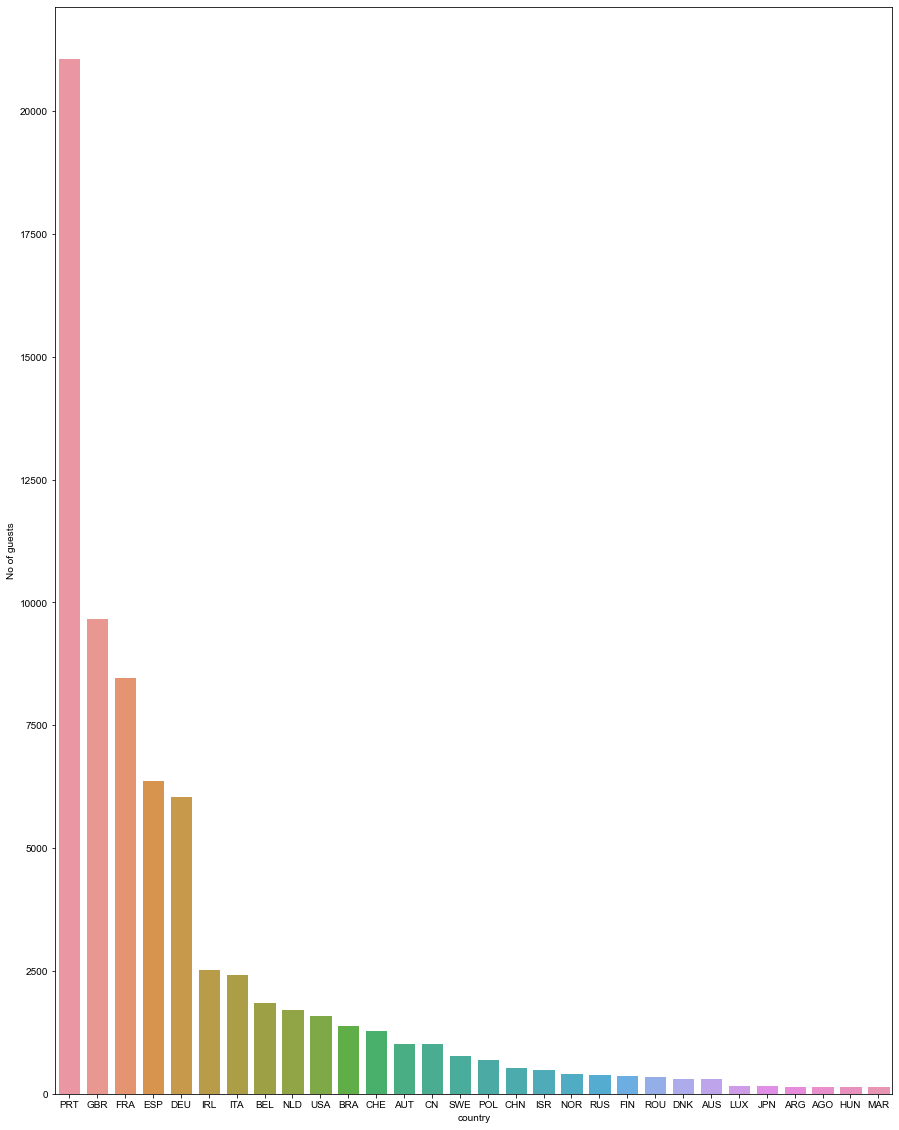

In [7]:
#Plotting top no. of guests from top 30 countries

ax = plt.subplots(figsize=(15,20))

sns.set(style="darkgrid")
ax = sns.barplot(x="country",y= "No of guests", data=country_guests)

In [8]:
#Findind the busiest months

city_guests = df['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,13877
1,July,12661
2,May,11791
3,October,11160
4,April,11089
5,June,10939
6,September,10508
7,March,9794
8,February,8068
9,November,6794


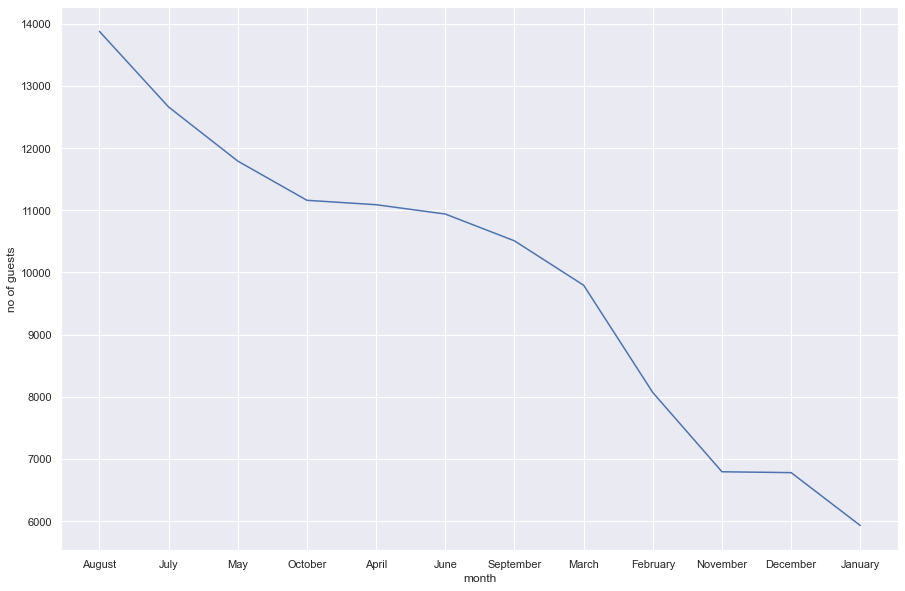

In [9]:
#Plotting busiest months

ax = plt.subplots(figsize=(15,10))

sns.set(style="darkgrid")
ax = sns.lineplot(x="month",y= "no of guests", data=city_guests)

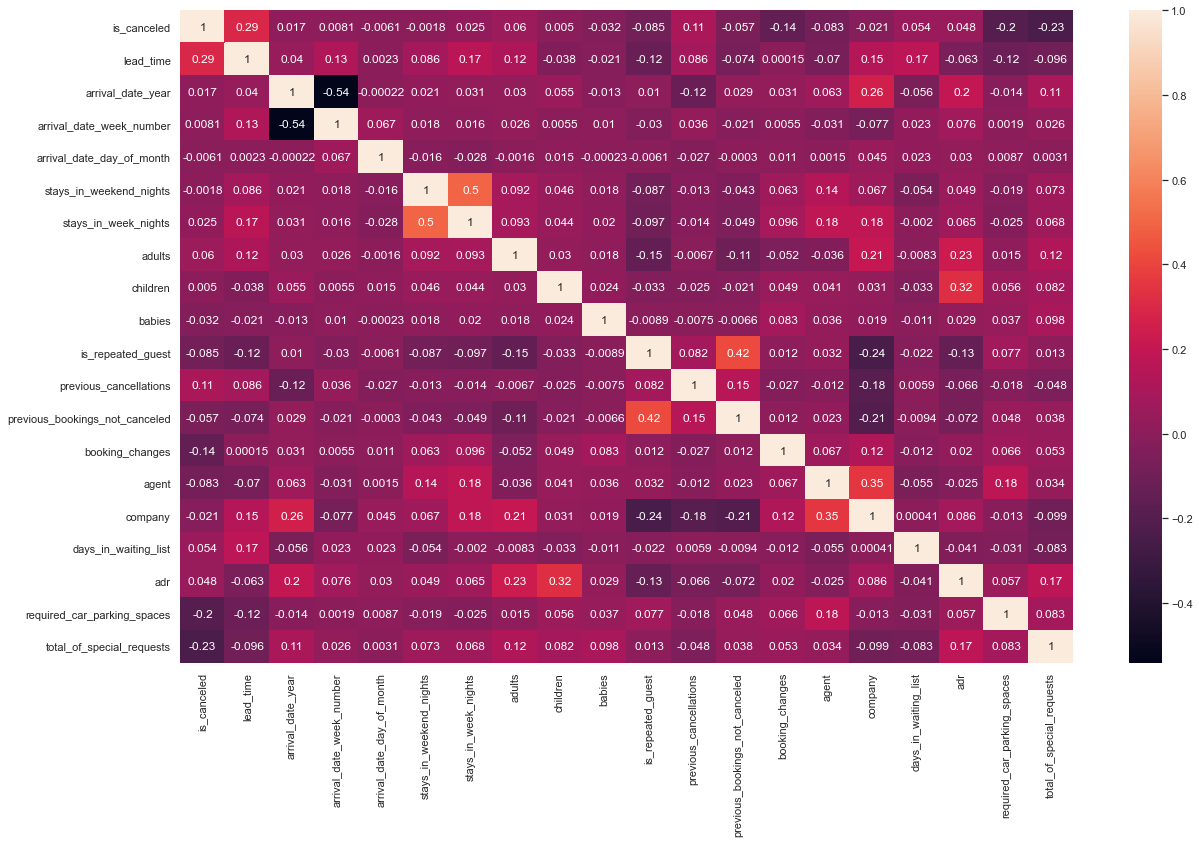

In [10]:
#Finding corrleation between all the elements

sns.set(rc = {'figure.figsize':(20,12)})

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [11]:
#Finding correlation between cancellation coloumn with all others

corr_canceled = df.corr()['is_canceled'].abs().sort_values(ascending = False)
corr_canceled

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [12]:
#Dropping very less correlated coloumns and useless coloumns

df = df.drop(columns=["agent", "company", "hotel", "reservation_status_date", "days_in_waiting_list", "arrival_date_year", 
                      "assigned_room_type", "booking_changes","reservation_status", "country"])

In [13]:
#Checking for null values

null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
is_canceled,0,0.00000
lead_time,0,0.00000
arrival_date_month,0,0.00000
arrival_date_week_number,0,0.00000
arrival_date_day_of_month,0,0.00000
stays_in_weekend_nights,0,0.00000
stays_in_week_nights,0,0.00000
adults,0,0.00000
children,4,0.00335
babies,0,0.00000


In [14]:
#Dropping remaining null values

df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119386 non-null  int64  
 1   lead_time                       119386 non-null  int64  
 2   arrival_date_month              119386 non-null  object 
 3   arrival_date_week_number        119386 non-null  int64  
 4   arrival_date_day_of_month       119386 non-null  int64  
 5   stays_in_weekend_nights         119386 non-null  int64  
 6   stays_in_week_nights            119386 non-null  int64  
 7   adults                          119386 non-null  int64  
 8   children                        119386 non-null  float64
 9   babies                          119386 non-null  int64  
 10  meal                            119386 non-null  object 
 11  market_segment                  119386 non-null  object 
 12  distribution_cha

In [16]:
#Declaring variables X and y

X = df.iloc[:,1:]
y = df["is_canceled"]

In [17]:
#Converting text data types to numeric vectors so that logistic regression can be applied:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [18]:
col_tran = make_column_transformer(
    (OneHotEncoder(),['arrival_date_month','meal','distribution_channel','market_segment','deposit_type','customer_type', 
                      'reserved_room_type']), remainder = 'passthrough')

In [19]:
X = col_tran.fit_transform(X)

In [20]:
X.shape

(119386, 60)

### Task 1 (30 points): Implement a Decision Tree Classifier for your classification problem. You may use a built-in package to implement your classifier. Try modifying one or more of the input parameters and describe what changes you notice in your results. Clearly describe how these factors are affecting your output.

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [74]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=None,min_samples_split=2,
    min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,random_state=None,
    max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,class_weight=None,ccp_alpha=0.0,)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [75]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8158923386196113


Changing input parameters of the model

In [97]:
# Create Decision Tree classifer object
clf_new = tree.DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=3,min_samples_split=2,
    min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,random_state=None,
    max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,class_weight=None,ccp_alpha=0.0,)

# Train Decision Tree Classifer
clf_new = clf_new.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_new.predict(X_test)

In [98]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7635972749609113


In [100]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [102]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
import pydotplus

dot_data = StringIO()
export_graphviz(clf_new, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hoteldemands.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

Decision trees can be optimized by using the method of pruning. This can be easily done by using the maximum depth as the control variable for pre-pruning.
Hence I changed the follwing parameters in the clf_new model.

Input parameters changed:
    
    ''Criterion from gini to entropy 
    ''Max_depth from None to 5000 

    
However, in this case, after chnaging the input parameter criterion to entropy from gini and max_depth from None to 5000, the output performance did not change much.

### Task 2 (30 points): From the Bagging and Boosting methods pick any one algorithm from each category. Implement both the algorithms using the same data. Use k-fold cross validation to find the effectiveness of both the models. Comment on the difference/similarity of the results.

### 1. Bagging

In [110]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

In [138]:
clf_bag = BaggingClassifier()

In [139]:
clf_bag = clf_bag.fit(X_train,y_train)

In [140]:
y_predbag = clf_bag.predict(X_test)

In [141]:
kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf_bag, X_train, y_train, scoring='accuracy', cv=kfold, n_jobs=-1, error_score='raise')


print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.845 (0.003)


### 2. Boosting 

In [113]:
from sklearn.ensemble import AdaBoostClassifier

In [120]:
clf_adaboost = AdaBoostClassifier(n_estimators=10, random_state=0, algorithm='SAMME')

In [144]:
clf_adaboost = clf_adaboost.fit(X_train,y_train)

In [148]:
y_predboost = clf_adaboost.predict(X_test)

In [123]:
kfold1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores1 = cross_val_score(clf_adaboost, X_train, y_train, scoring='accuracy', cv=kfold1, n_jobs=-1, error_score='raise')


print('Accuracy: %.3f (%.3f)' % (mean(n_scores1), std(n_scores1)))

Accuracy: 0.776 (0.019)


In the above implemented Bagging and Boosting models, Bagging gave an accuracy score of 84.5% while Boosting gave an accuracy score of 77.6%, hence Boosting performed slightly better.  

### Task 3 (40 points): Compare the effectiveness of the three models implemented above. Clearly describe the metric you are using for comparison. Describe (with examples) Why is this metric(metrics) suited/appropriate for the problem at hand? How would a choice of a different metric impact your results? Can you demonstrate that?

In [154]:
print("Accuracy for Decision Tree model:",metrics.accuracy_score(y_test, y_pred))

print("Accuracy for Bagging model:",metrics.accuracy_score(y_test, y_predbag))

print("Accuracy for Boosting model:",metrics.accuracy_score(y_test, y_predboost))

Accuracy for Decision Tree model: 0.7635972749609113
Accuracy for Bagging model: 0.8490618717891445
Accuracy for Boosting model: 0.7509492964038419


In [151]:
from sklearn.metrics import log_loss

log_loss_decisiontrees = log_loss(y_test, y_pred)
print("Logloss for Decision Tree model: %.2f" % (accuracy_decisiontrees))

log_loss_bagging = log_loss(y_test, y_predbag)
print("Logloss for Bagging model: %.2f" % (log_loss_bagging))

log_loss_boost = log_loss(y_test, y_predboost)
print("Logloss for Decision Tree model: %.2f" % (log_loss_boost))

Logloss for Decision Tree model: 8.17
Logloss for Bagging model: 5.21
Logloss for Decision Tree model: 8.60


In [153]:
from sklearn.metrics import roc_auc_score

roc_auc_decisiontrees = roc_auc_score(y_test, y_pred)
print("ROC_AUC Score for Decision Tree model: %.2f" % (roc_auc_decisiontrees))

log_loss_bagging = roc_auc_score(y_test, y_predbag)
print("ROC_AUC Score for Decision Tree model: %.2f" % (log_loss_bagging))

log_loss_boost = roc_auc_score(y_test, y_predboost)
print("ROC_AUC Score for Decision Tree model: %.2f" % (log_loss_boost))

ROC_AUC Score for Decision Tree model: 0.69
ROC_AUC Score for Decision Tree model: 0.83
ROC_AUC Score for Decision Tree model: 0.67


LogLoss
It measures the performance of a classification model where the prediction input is a probability value between 0 and 1. Log loss increases as the predicted probability diverge from the actual label. The goal of any machine learning model is to minimize this value. As such, smaller log loss is better, with a perfect model having a log loss of 0.

Area Under ROC Curve (or ROC AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.